# Test: get_historical_data for NOVO-B.CO
This notebook demonstrates and validates the updated `get_historical_data` function from `data_fetcher.py` for the ticker **NOVO-B.CO**. It checks that the DataFrame includes the new `ReinvestmentRate` column and that no errors occur.

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import yfinance as yf
from data_fetcher import *

In [ ]:
ticker = 'GMAB.CO'
cf = yf.Ticker(ticker).ttm_cashflow
raw_balance_ttm = yf.Ticker(ticker).quarterly_raw_balance
income_statement = yf.Ticker(ticker).ttm_incomestmt

In [ ]:
yf.Ticker(ticker).quarterly_balance_sheet

DatetimeIndex(['2025-03-31', '2024-12-31', '2024-09-30', '2024-06-30',
               '2024-03-31', '2023-12-31'],
              dtype='datetime64[ns]', freq=None)

In [ ]:
# Calculate change in working capital (WC) from raw_balance_ttm

# Working Capital = Current Assets - Current Liabilities
# Common current assets: 'Cash And Cash Equivalents', 'Accounts Receivable', 'Other Short Term Investments'
# Common current liabilities: 'Accounts Payable', 'Short Term Debt', 'Other Current Liabilities'

# Extract relevant rows (fill missing with 0)
current_assets = (
    raw_balance_ttm.loc['Cash And Cash Equivalents'].astype(float).fillna(0) +
    raw_balance_ttm.loc['Accounts Receivable'].astype(float).fillna(0) +
    raw_balance_ttm.loc['Other Short Term Investments'].astype(float).fillna(0)
)

# Try to get current liabilities, fill missing with 0
liab_rows = []
for row in ['Accounts Payable', 'Short Term Debt', 'Other Current Liabilities']:
    if row in raw_balance_ttm.index:
        liab_rows.append(raw_balance_ttm.loc[row].astype(float).fillna(0))
if liab_rows:
    current_liabilities = sum(liab_rows)
else:
    current_liabilities = 0

working_capital = current_assets - current_liabilities

# Convert columns to DatetimeIndex for sorting
working_capital.index = pd.to_datetime(working_capital.index)
working_capital = working_capital.sort_index()

# Calculate change in working capital compared to the same date one year prior
change_in_wc = working_capital - working_capital.shift(4)
change_in_wc = change_in_wc.dropna()

print("Working Capital:")
print(working_capital)
print("\nChange in Working Capital:")
print(change_in_wc)

Working Capital:
2023-12-31    0.000000e+00
2024-03-31    3.426300e+10
2024-06-30    2.190100e+10
2024-09-30    2.362800e+10
2024-12-31    2.769100e+10
2025-03-31    4.025000e+09
dtype: float64

Change in Working Capital:
2024-12-31    2.769100e+10
2025-03-31   -3.023800e+10
dtype: float64


In [5]:
4.025000e+09- 3.426300e+10

-30238000000.0

In [16]:
def calculate_ttm_change_in_working_capital(raw_balance_ttm):
    """
    Calculate working capital and its change from a balance sheet DataFrame.
    Returns (working_capital: pd.Series, change_in_wc: pd.Series)
    """
    working_capital = raw_balance_ttm.loc['Current Assets'] - raw_balance_ttm.loc['Current Liabilities']

    # Convert columns to DatetimeIndex for sorting
    working_capital.index = pd.to_datetime(working_capital.index)
    working_capital = working_capital.sort_index()

    # Calculate change in working capital compared to the same date one year prior
    change_in_wc = working_capital - working_capital.shift(4)
    change_in_wc = change_in_wc.dropna()
    print("Working Capital:")
    print(working_capital)
    print("\nChange in Working Capital:")
    print(change_in_wc)
    return change_in_wc.iloc[-1]

In [17]:
calculate_ttm_change_in_working_capital(yf.Ticker(ticker).quarterly_balance_sheet)

Working Capital:
2023-12-31              NaN
2024-03-31    31610000000.0
2024-06-30    17573000000.0
2024-09-30    19114000000.0
2024-12-31    22546000000.0
2025-03-31     3281000000.0
dtype: object

Change in Working Capital:
2025-03-31   -28329000000.0
dtype: object


-28329000000.0

In [ ]:
raw_balance_ttm.loc['Cash And Cash Equivalents']

2025-03-31     1619000000.0
2024-12-31     9858000000.0
2024-09-30     6342000000.0
2024-06-30     4331000000.0
2024-03-31    14670000000.0
2023-12-31              NaN
Name: Cash And Cash Equivalents, dtype: object

In [ ]:
# Test Data Fetching for NOVO-B.CO
ticker = 'NOVO-B.CO'
df, valuation_info = get_historical_data(ticker)
display(df)
print('Valuation Info:', valuation_info)

,Revenue,EBITDA,Net Income,FCF,Depreciation And Amortization,Total Debt,Cash,CapEx,Operating Cash Flow,Net Issuance Payments Of Debt,Current Assets,Current Liabilities,ttm,Delta WC,Change in Debt,FCFE,ReinvestmentRate,FCFF
2020-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
2021-12-31,1.408000e+11,6.539400e+10,4.775700e+10,4.761500e+10,6.025000e+09,2.664500e+10,NaN,-7.385000e+09,5.500000e+10,1.547100e+10,8.559500e+10,9.951600e+10,0,NaN,NaN,NaN,NaN,NaN
2022-12-31,1.769540e+11,7.680200e+10,5.552500e+10,6.413400e+10,7.362000e+09,2.578400e+10,NaN,-1.475300e+10,7.888700e+10,-2.408000e+09,1.081940e+11,1.209400e+11,0,NaN,NaN,9.533400e+10,-0.080935,9.774200e+10
2023-12-31,2.322610e+11,1.146290e+11,8.368300e+10,7.001200e+10,9.413000e+09,2.700600e+10,NaN,-3.889600e+10,1.089080e+11,-1.467000e+09,1.396460e+11,1.696550e+11,0,NaN,NaN,1.787340e+11,-0.407803,1.802010e+11
2024-12-31,2.904030e+11,1.373760e+11,1.009880e+11,6.965900e+10,8.545000e+09,1.027870e+11,NaN,-5.130900e+10,1.209680e+11,7.305600e+10,1.608970e+11,2.175280e+11,0,NaN,NaN,2.969080e+11,-0.505081,2.238520e+11
TTM,3.031410e+11,1.465160e+11,1.046150e+11,7.435900e+10,9.461000e+09,1.187230e+11,NaN,-5.688600e+10,1.312450e+11,8.870400e+10,1.743950e+11,2.361170e+11,1,-1.253700e+10,9.179500e+10,3.066580e+11,NaN,2.179540e+11


Valuation Info: {'market_cap': 1498814060761.5999, 'share_price': 444.95, 'number_shares': 3368499968, 'enterprise_value': 2028777242624, 'total_debt': np.float64(102787000000.0), 'cash': nan, 'net_debt': nan}


In [ ]:
print("FCFF values:")
print(df['FCFF'])

print("\nFCFE values:")
print(df['FCFE'])

FCFF values:
2020-12-31             NaN
2021-12-31             NaN
2022-12-31    9.774200e+10
2023-12-31    1.802010e+11
2024-12-31    2.238520e+11
TTM           2.179540e+11
Name: FCFF, dtype: float64

FCFE values:
2020-12-31             NaN
2021-12-31             NaN
2022-12-31    9.533400e+10
2023-12-31    1.787340e+11
2024-12-31    2.969080e+11
TTM           3.066580e+11
Name: FCFE, dtype: float64


In [ ]:
# Investigate available rows and CapEx in TTM cashflow
print('raw_cashflow_ttm rows:', list(raw_cashflow_ttm.index) if 'raw_cashflow_ttm' in globals() and raw_cashflow_ttm is not None else 'None')
if 'raw_cashflow_ttm' in globals() and raw_cashflow_ttm is not None:
    if 'Capital Expenditures' in raw_cashflow_ttm.index:
        print('Capital Expenditures TTM:', raw_cashflow_ttm.loc['Capital Expenditures'])
    else:
        print('Capital Expenditures TTM: Not found')
    if 'Capital Expenditure' in raw_cashflow_ttm.index:
        print('Capital Expenditure TTM:', raw_cashflow_ttm.loc['Capital Expenditure'])
    else:
        print('Capital Expenditure TTM: Not found')

raw_cashflow_ttm rows: None


In [1]:
!python cli.py --config dcf_config.json --ticker NOVO-B.CO 

Analyzing Novo Nordisk A/S (NOVO-B.CO)...
Using WACC=0.0730 (max of input=0.0600 and estimated=0.0730)


C:\Users\adamw\AppData\Local\Temp\ipykernel_21084\1271700734.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\adamw\AppData\Local\Temp\ipykernel_21084\1271700734.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\adamw\AppData\Local\Temp\ipykernel_21084\1271700734.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\adamw\AppData\Local\Temp\ipykernel_21084\1271700734.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `h

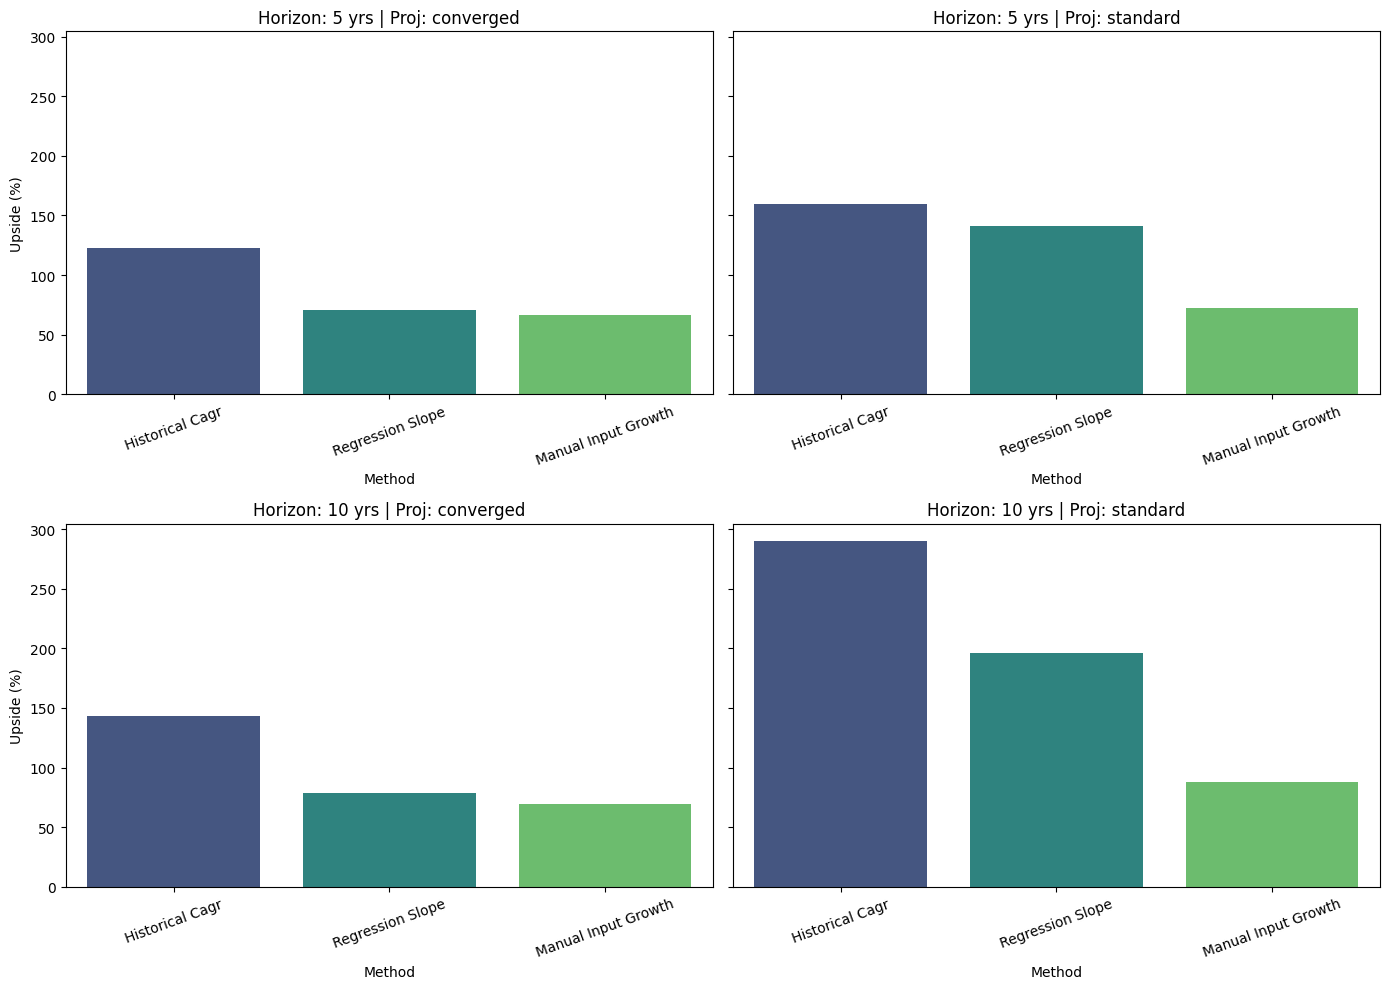

In [2]:
import seaborn as sns
from io import StringIO
import pandas as pd
import matplotlib.pyplot as plt

# Provided CSV data
csv_data = """ticker,name,horizon,proj_type,fcf_source,p_method,method_label,used_wacc,per_share_value,current_share_price,upside,average_growth_rate
NOVO-B.CO,Novo Nordisk A/S,5,standard,FCFF,cagr,Historical Cagr,0.11,1146,442,160.0,0.15
NOVO-B.CO,Novo Nordisk A/S,5,standard,FCFF,slope,Regression Slope,0.11,1063,442,141.0,0.14
NOVO-B.CO,Novo Nordisk A/S,5,standard,FCFF,man_inp_growth,Manual Input Growth,0.11,761,442,72.39,0.05
NOVO-B.CO,Novo Nordisk A/S,5,converged,FCFF,cagr,Historical Cagr,0.11,987,442,123.0,0.1
NOVO-B.CO,Novo Nordisk A/S,5,converged,FCFF,slope,Regression Slope,0.11,752,442,70.3,0.07
NOVO-B.CO,Novo Nordisk A/S,5,converged,FCFF,man_inp_growth,Manual Input Growth,0.11,734,442,66.24,0.04
NOVO-B.CO,Novo Nordisk A/S,10,standard,FCFF,cagr,Historical Cagr,0.11,1720,442,290.0,0.15
NOVO-B.CO,Novo Nordisk A/S,10,standard,FCFF,slope,Regression Slope,0.11,1307,442,196.0,0.11
NOVO-B.CO,Novo Nordisk A/S,10,standard,FCFF,man_inp_growth,Manual Input Growth,0.11,831,442,88.29,0.05
NOVO-B.CO,Novo Nordisk A/S,10,converged,FCFF,cagr,Historical Cagr,0.11,1073,442,143.0,0.07
NOVO-B.CO,Novo Nordisk A/S,10,converged,FCFF,slope,Regression Slope,0.11,788,442,78.52,0.05
NOVO-B.CO,Novo Nordisk A/S,10,converged,FCFF,man_inp_growth,Manual Input Growth,0.11,748,442,69.4,0.03"""

# Read the data into a DataFrame
df_upside = pd.read_csv(StringIO(csv_data))

# Set up the 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharey=True)
horizons = sorted(df_upside['horizon'].unique())
proj_types = sorted(df_upside['proj_type'].unique())

for i, horizon in enumerate(horizons):
    for j, proj_type in enumerate(proj_types):
        ax = axes[i, j]
        subset = df_upside[(df_upside['horizon'] == horizon) & (df_upside['proj_type'] == proj_type)]
        sns.barplot(
            data=subset,
            x='method_label',
            y='upside',
            ax=ax,
            palette='viridis'
        )
        ax.set_title(f'Horizon: {horizon} yrs | Proj: {proj_type}')
        ax.set_xlabel('Method')
        ax.set_ylabel('Upside (%)' if j == 0 else '')
        ax.tick_params(axis='x', rotation=20)

plt.tight_layout()
plt.show()

In [2]:
# Check if beta is available for Novo Nordisk A/S
import yfinance as yf
novo = yf.Ticker("NOVO-B.CO")
beta = novo.info.get("beta", None)
print(f"Beta for NOVO-B.CO: {beta}")

Beta for NOVO-B.CO: 0.224


In [17]:
import yfinance as yf

def get_country_index(ticker):
    """
    Returns a recommended major index ticker for beta calculation based on the company's country.
    Uses yfinance to fetch the country from ticker.info.
    """
    # Mapping of country names to major index tickers
    country_index_map = {
        "United States": "^GSPC",      # S&P 500
        "Denmark": "^OMXC25",          # OMX Copenhagen 25
        "Sweden": "^OMXS30",           # OMX Stockholm 30
        "Norway": "^OBX",              # Oslo OBX
        "Finland": "^OMXH25",          # OMX Helsinki 25
        "Germany": "^GDAXI",           # DAX
        "France": "^FCHI",             # CAC 40
        "United Kingdom": "^FTSE",     # FTSE 100
        "Netherlands": "^AEX",         # AEX
        "Switzerland": "^SSMI",        # SMI
        "Italy": "FTSEMIB.MI",         # FTSE MIB
        "Spain": "^IBEX",              # IBEX 35
        "Japan": "^N225",              # Nikkei 225
        "China": "000001.SS",          # SSE Composite
        "Hong Kong": "^HSI",           # Hang Seng
        "Canada": "^GSPTSE",           # S&P/TSX
        "Australia": "^AXJO",          # ASX 200
        # Add more as needed
    }
    try:
        info = yf.Ticker(ticker).info
        country = info.get("country", None)
        if country is None:
            print(f"Could not determine country for {ticker}.")
            return None
        index = country_index_map.get(country, None)
        if index is None:
            print(f"No index mapping found for country: {country}")
        return index
    except Exception as e:
        print(f"Error fetching info for {ticker}: {e}")
        return None

# Example usage:
index_ticker = get_country_index("NOVO-B.CO")
print(f"Suggested index for beta calculation: {index_ticker}")

Suggested index for beta calculation: ^OMXC25


C:\Users\adamw\AppData\Local\Temp\ipykernel_24264\4070511106.py:57: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download([ticker, index_ticker], start=start_date, end=end_date)
[*********************100%***********************]  2 of 2 completed


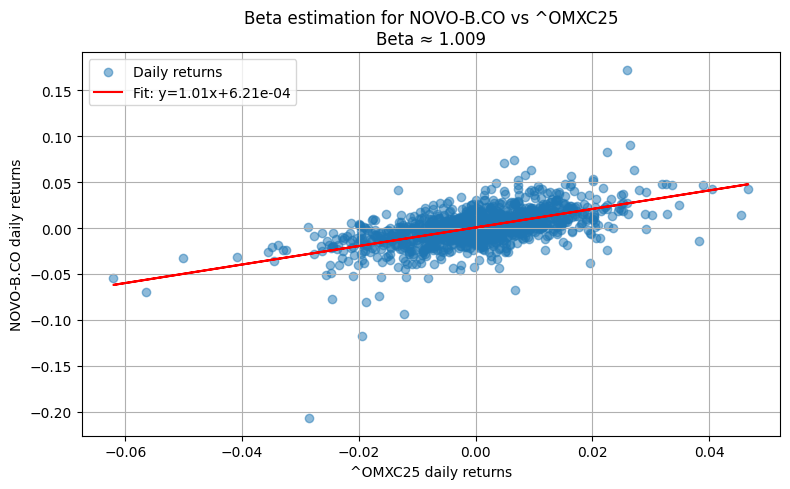

Estimated beta against local index: 1.009


In [18]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

def get_country_index(ticker):
    """
    Returns a recommended major index ticker for beta calculation based on the company's country.
    Uses yfinance to fetch the country from ticker.info.
    """
    country_index_map = {
        "United States": "^GSPC",      # S&P 500
        "Denmark": "^OMXC25",          # OMX Copenhagen 25
        "Sweden": "^OMXS30",           # OMX Stockholm 30
        "Norway": "^OBX",              # Oslo OBX
        "Finland": "^OMXH25",          # OMX Helsinki 25
        "Germany": "^GDAXI",           # DAX
        "France": "^FCHI",             # CAC 40
        "United Kingdom": "^FTSE",     # FTSE 100
        "Netherlands": "^AEX",         # AEX
        "Switzerland": "^SSMI",        # SMI
        "Italy": "FTSEMIB.MI",         # FTSE MIB
        "Spain": "^IBEX",              # IBEX 35
        "Japan": "^N225",              # Nikkei 225
        "China": "000001.SS",          # SSE Composite
        "Hong Kong": "^HSI",           # Hang Seng
        "Canada": "^GSPTSE",           # S&P/TSX
        "Australia": "^AXJO",          # ASX 200
        # Add more as needed
    }
    try:
        info = yf.Ticker(ticker).info
        country = info.get("country", None)
        if country is None:
            print(f"Could not determine country for {ticker}.")
            return None
        index = country_index_map.get(country, None)
        if index is None:
            print(f"No index mapping found for country: {country}")
        return index
    except Exception as e:
        print(f"Error fetching info for {ticker}: {e}")
        return None

def estimate_beta_against_index(ticker, period_years=5, plot=True):
    """
    Estimate beta for a stock against its local major index.
    """
    index_ticker = get_country_index(ticker)
    if index_ticker is None:
        raise ValueError(f"Could not determine index for ticker {ticker}.")
    end_date = datetime.today()
    start_date = end_date - timedelta(days=period_years * 365)
    
    # Download adjusted close prices
    data = yf.download([ticker, index_ticker], start=start_date, end=end_date)
    if 'Close' not in data.columns:
        raise ValueError("'Close' not found in downloaded data. Data may be empty or ticker symbols may be incorrect.")
    close = data['Close'].dropna()
    if ticker not in close.columns or index_ticker not in close.columns:
        raise ValueError(f"One or both tickers not found in 'Close': {ticker}, {index_ticker}")
    
    # Calculate daily returns
    returns = close.pct_change().dropna()
    stock_returns = returns[ticker]
    index_returns = returns[index_ticker]
    
    # Calculate covariance and variance
    cov = stock_returns.cov(index_returns)
    var = index_returns.var()
    
    # Beta calculation
    beta_est = cov / var

    # Plot if requested
    if plot:
        plt.figure(figsize=(8, 5))
        plt.scatter(index_returns, stock_returns, alpha=0.5, label='Daily returns')
        # Regression line
        m, b = np.polyfit(index_returns, stock_returns, 1)
        plt.plot(index_returns, m * index_returns + b, color='red', label=f'Fit: y={m:.2f}x+{b:.2e}')
        plt.title(f"Beta estimation for {ticker} vs {index_ticker}\nBeta ≈ {beta_est:.3f}")
        plt.xlabel(f"{index_ticker} daily returns")
        plt.ylabel(f"{ticker} daily returns")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    
    return beta_est

# Example usage:
beta = estimate_beta_against_index("NOVO-B.CO")
print(f"Estimated beta against local index: {beta:.3f}")

In [10]:
# Check what yf.download returns for adjusted close prices
ticker="NOVO-B.CO" 
index_ticker="^OMXC25"
end_date = datetime.today()
start_date = end_date - timedelta(days=5 * 365)
data = yf.download([ticker, index_ticker], start=start_date, end=end_date)['Close']
print(data.head())
print("\nColumns:", data.columns)
print("\nAdjusted Close (dropna):")
print(data['Close'].dropna().head())

C:\Users\adamw\AppData\Local\Temp\ipykernel_24264\4111702691.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download([ticker, index_ticker], start=start_date, end=end_date)['Close']
[*********************100%***********************]  2 of 2 completed

Ticker       NOVO-B.CO      ^OMXC25
Date                               
2020-07-06  201.041733  1392.040039
2020-07-07  198.416458  1392.510010
2020-07-08  199.659973  1399.829956
2020-07-09  199.337601  1405.199951
2020-07-10  198.900040  1408.869995

Columns: Index(['NOVO-B.CO', '^OMXC25'], dtype='object', name='Ticker')

Adjusted Close (dropna):


KeyError: 'Close'